In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
## data is in unit MWh och det finns 8760 rader (en per timme)
prod_data = pd.read_csv("2024_prod.csv", sep=';',)
##load_data = pd.read_csv("2024_load.csv", sep=";")
consum_data = pd.read_csv("2024_consum.csv", sep=";")

In [29]:
prod_data

,Date/Time CET/CEST,Date/Time UTC,MBA,Production Total [MWh],Hydro [MWh],Nuclear [MWh],Solar [MWh],Thermal [MWh],Wind Onshore [MWh],Wind Offshore [MWh],Energy Storage [MWh],Other [MWh]
0,01.01.2024/00:00,31.12.2023/23:00,"SE1, SE2, SE3, SE4","17194,164211","5881,938064","6300,99","0,939435","809,767436","4172,928605",0,0,"27,600671"
1,01.01.2024/01:00,01.01.2024/00:00,"SE1, SE2, SE3, SE4","16892,208784","5607,845686","6302,19","0,939513","802,489977","4149,314518",0,0,"29,42909"
2,01.01.2024/02:00,01.01.2024/01:00,"SE1, SE2, SE3, SE4","16664,7559","5383,490754","6301,92","0,971884","795,055549","4153,782483",0,0,"29,53523"
3,01.01.2024/03:00,01.01.2024/02:00,"SE1, SE2, SE3, SE4","16594,797267","5281,014751","6302,21","0,919221","808,631964","4172,891047",0,0,"29,130284"
4,01.01.2024/04:00,01.01.2024/03:00,"SE1, SE2, SE3, SE4","16705,257082","5362,25403","6302,8","0,981863","816,435979","4192,743722",0,0,"30,041488"
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,31.12.2024/19:00,31.12.2024/18:00,"SE1, SE2, SE3, SE4","23134,88801","11071,409683","5839,69","1,507701","587,437576","5619,81528",0,"3,182586","11,845184"
8780,31.12.2024/20:00,31.12.2024/19:00,"SE1, SE2, SE3, SE4","23112,690303","10814,311539","5839,29","2,658814","561,721017","5878,773727",0,"3,08382","12,851386"
8781,31.12.2024/21:00,31.12.2024/20:00,"SE1, SE2, SE3, SE4","22640,390382","10533,869627","5840,82","3,557847","550,798398","5680,63706",0,"2,179222","28,528228"
8782,31.12.2024/22:00,31.12.2024/21:00,"SE1, SE2, SE3, SE4","21897,156155","9874,359918","5841,14","2,235744","498,851834","5646,601684",0,"2,203276","31,763699"


In [30]:
import numpy as np
import re

def _to_float_locale(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    # remove normal and non-breaking spaces
    s = s.replace('\xa0', '').replace(' ', '')
    # if both dot and comma present, assume dot is thousands sep and comma decimal sep
    if '.' in s and ',' in s:
        s = s.replace('.', '').replace(',', '.')
    else:
        s = s.replace(',', '.')
    # keep only digits, dot and minus
    s = re.sub(r'[^\d\.\-]', '', s)
    try:
        return float(s)
    except:
        return np.nan


In [31]:
## gör om alla värden till float
prod_data['Production Total [MWh]'] = prod_data['Production Total [MWh]'].apply(_to_float_locale)
prod_data['Hydro [MWh]'] = prod_data['Hydro [MWh]'].apply(_to_float_locale)
prod_data['Nuclear [MWh]'] = prod_data['Nuclear [MWh]'].apply(_to_float_locale)
prod_data['Solar [MWh]'] = prod_data['Solar [MWh]'].apply(_to_float_locale)
prod_data['Thermal [MWh]'] = prod_data['Thermal [MWh]'].apply(_to_float_locale)
prod_data['Wind Onshore [MWh]'] = prod_data['Wind Onshore [MWh]'].apply(_to_float_locale)
prod_data['Wind Offshore [MWh]'] = prod_data['Wind Offshore [MWh]'].apply(_to_float_locale)
prod_data['Energy Storage [MWh]'] = prod_data['Energy Storage [MWh]'].apply(_to_float_locale)
prod_data['Other [MWh]'] = prod_data['Other [MWh]'].apply(_to_float_locale)

consum_data['Consumption Total [MWh]'] = consum_data['Consumption Total [MWh]'].apply(_to_float_locale)

In [32]:
consum_data['Consumption Total [MWh]']= consum_data['Consumption Total [MWh]']*-1
consum_data['Consumption Total [MWh]'].sum()/1000000 # in TWh

np.float64(128.508114290807)

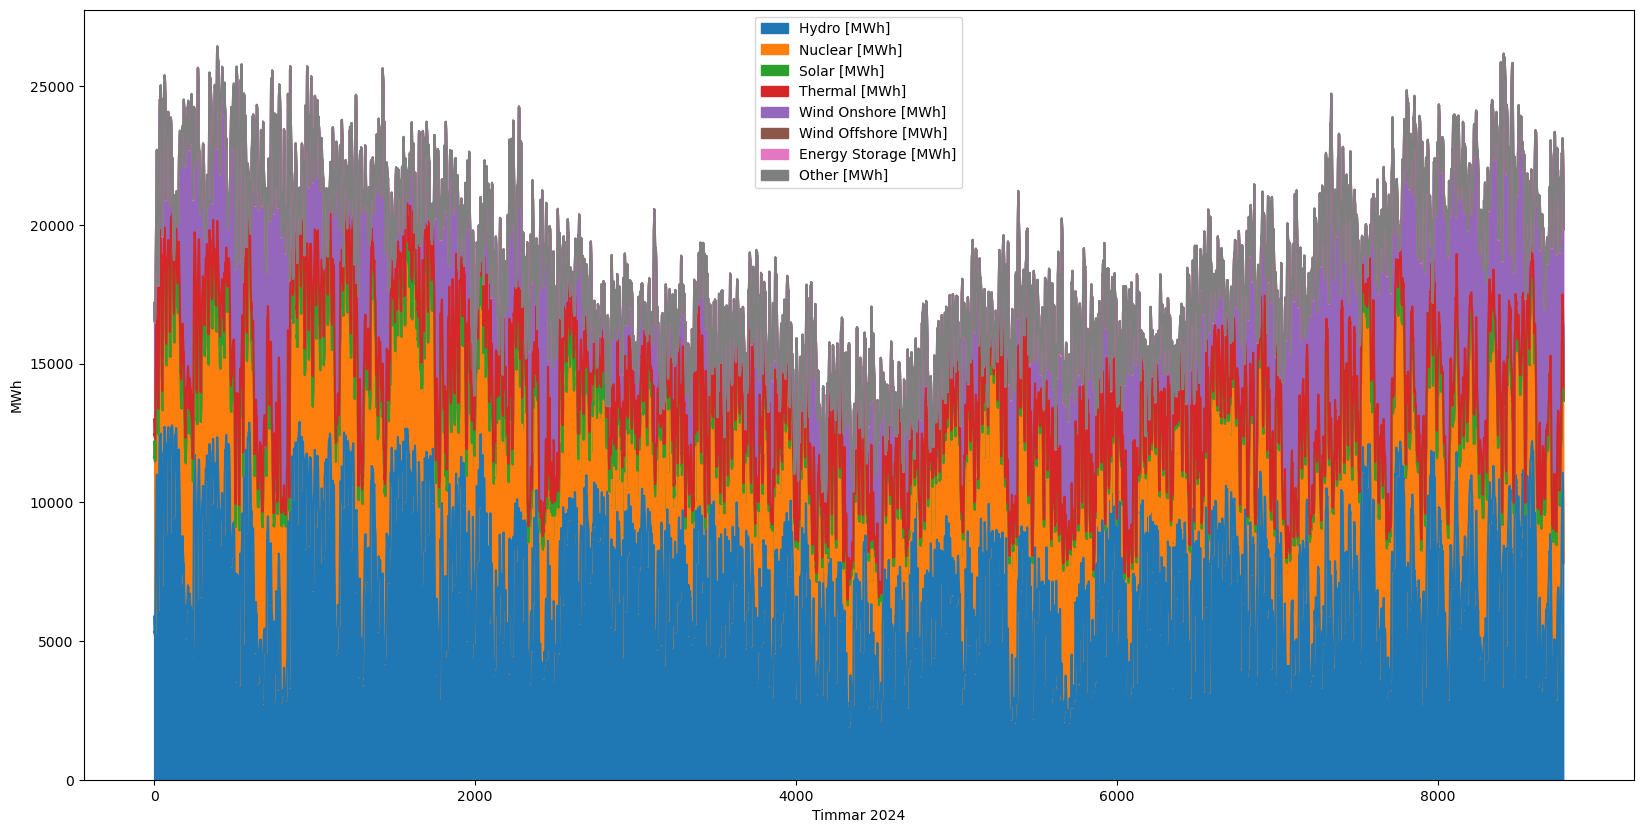

In [33]:
## alla prod källor (stacked graf)
ax_3 = pd.concat([prod_data["Hydro [MWh]"], prod_data["Nuclear [MWh]"],prod_data['Solar [MWh]'], prod_data['Thermal [MWh]'],prod_data['Wind Onshore [MWh]'],prod_data['Wind Offshore [MWh]'],prod_data['Energy Storage [MWh]'],prod_data['Other [MWh]']    ],axis=1).plot.area(figsize=(20, 10), stacked=True)
ax_3.set_xlabel('Timmar 2024')
ax_3.set_ylabel('MWh')
plt.show()

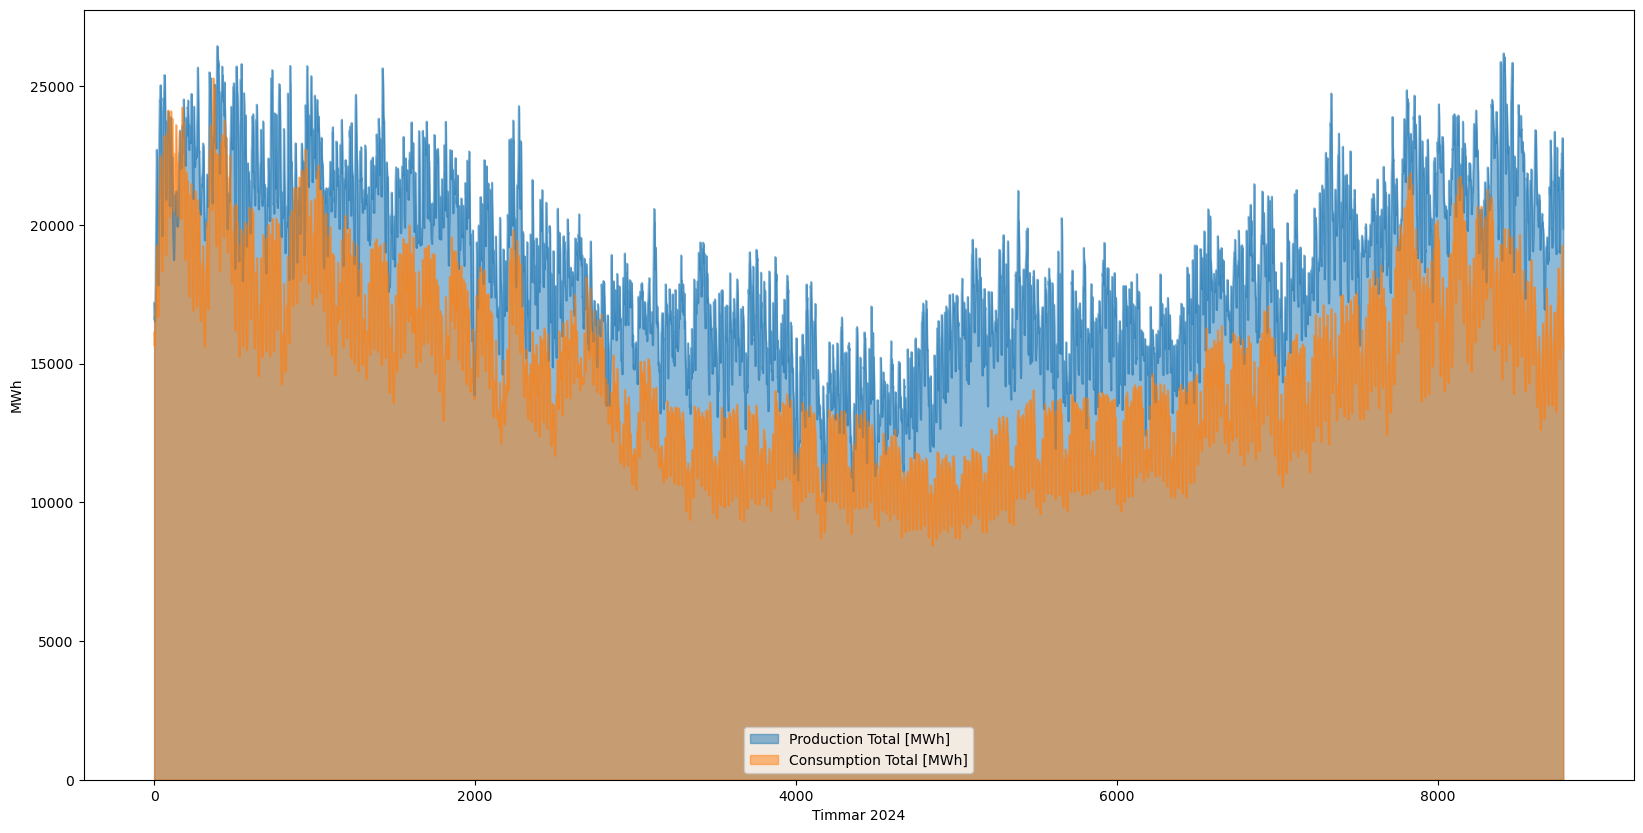

In [34]:
## Plottar 2024 prod och last
ax_3 = pd.concat([prod_data['Production Total [MWh]'] , consum_data['Consumption Total [MWh]'] ],axis=1).plot.area(figsize=(20, 10), stacked=False)
ax_3.set_xlabel('Timmar 2024')
ax_3.set_ylabel('MWh')
plt.show()

In [35]:
##  Ökning av total last till 300 TWh under 2024 -----------------------------------------------------------------------------------------------------------------------------------
consum_300_data = consum_data.copy()
consum_300_data['Consumption Total [MWh]'] = consum_300_data['Consumption Total [MWh]'] * (300000000/consum_300_data['Consumption Total [MWh]'].sum())

In [36]:
consum_300_data['Consumption Total [MWh]'].sum()/1000000

np.float64(300.0)

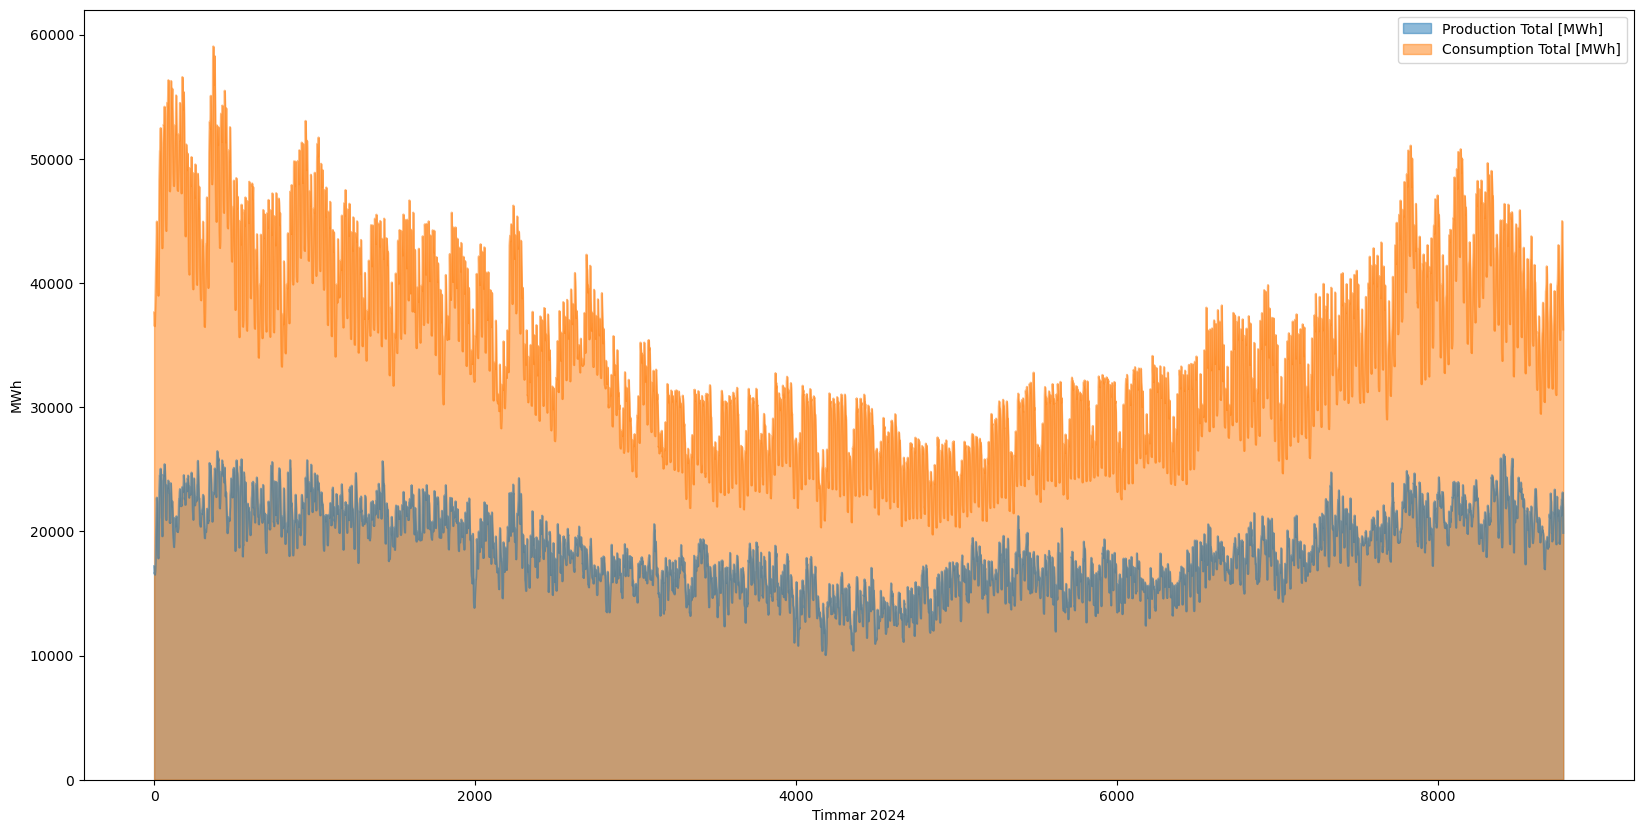

In [37]:
## Plottar 2024 prod och 300TWh lasty
ax_3 = pd.concat([prod_data['Production Total [MWh]'] , consum_300_data['Consumption Total [MWh]'] ],axis=1).plot.area(figsize=(20, 10), stacked=False)
ax_3.set_xlabel('Timmar 2024')
ax_3.set_ylabel('MWh')
plt.show()

In [12]:
## Olika senarier -----------------------------------------------------------------------------------------------------------------------------------
# Börjar med att 5x vind prod
## note wind offshore är typ noll

In [47]:
prod_vind_data_5 = prod_data.copy()

In [48]:
prod_vind_data_5['Wind Onshore [MWh]'] = prod_vind_data_5['Wind Onshore [MWh]']*3
prod_vind_data_5['Solar [MWh]'] = prod_vind_data_5['Solar [MWh]']*4

In [49]:
prod_vind_data_5

,Date/Time CET/CEST,Date/Time UTC,MBA,Production Total [MWh],Hydro [MWh],Nuclear [MWh],Solar [MWh],Thermal [MWh],Wind Onshore [MWh],Wind Offshore [MWh],Energy Storage [MWh],Other [MWh]
0,01.01.2024/00:00,31.12.2023/23:00,"SE1, SE2, SE3, SE4",17194.164211,5881.938064,6300.99,3.757740,809.767436,12518.785815,0.0,0.000000,27.600671
1,01.01.2024/01:00,01.01.2024/00:00,"SE1, SE2, SE3, SE4",16892.208784,5607.845686,6302.19,3.758052,802.489977,12447.943554,0.0,0.000000,29.429090
2,01.01.2024/02:00,01.01.2024/01:00,"SE1, SE2, SE3, SE4",16664.755900,5383.490754,6301.92,3.887536,795.055549,12461.347449,0.0,0.000000,29.535230
3,01.01.2024/03:00,01.01.2024/02:00,"SE1, SE2, SE3, SE4",16594.797267,5281.014751,6302.21,3.676884,808.631964,12518.673141,0.0,0.000000,29.130284
4,01.01.2024/04:00,01.01.2024/03:00,"SE1, SE2, SE3, SE4",16705.257082,5362.254030,6302.80,3.927452,816.435979,12578.231166,0.0,0.000000,30.041488
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,31.12.2024/19:00,31.12.2024/18:00,"SE1, SE2, SE3, SE4",23134.888010,11071.409683,5839.69,6.030804,587.437576,16859.445840,0.0,3.182586,11.845184
8780,31.12.2024/20:00,31.12.2024/19:00,"SE1, SE2, SE3, SE4",23112.690303,10814.311539,5839.29,10.635256,561.721017,17636.321181,0.0,3.083820,12.851386
8781,31.12.2024/21:00,31.12.2024/20:00,"SE1, SE2, SE3, SE4",22640.390382,10533.869627,5840.82,14.231388,550.798398,17041.911180,0.0,2.179222,28.528228
8782,31.12.2024/22:00,31.12.2024/21:00,"SE1, SE2, SE3, SE4",21897.156155,9874.359918,5841.14,8.942976,498.851834,16939.805052,0.0,2.203276,31.763699


In [50]:
prod_vind_data_5['Production Total [MWh]'] = prod_vind_data_5.iloc[:,4:].sum(axis=1)

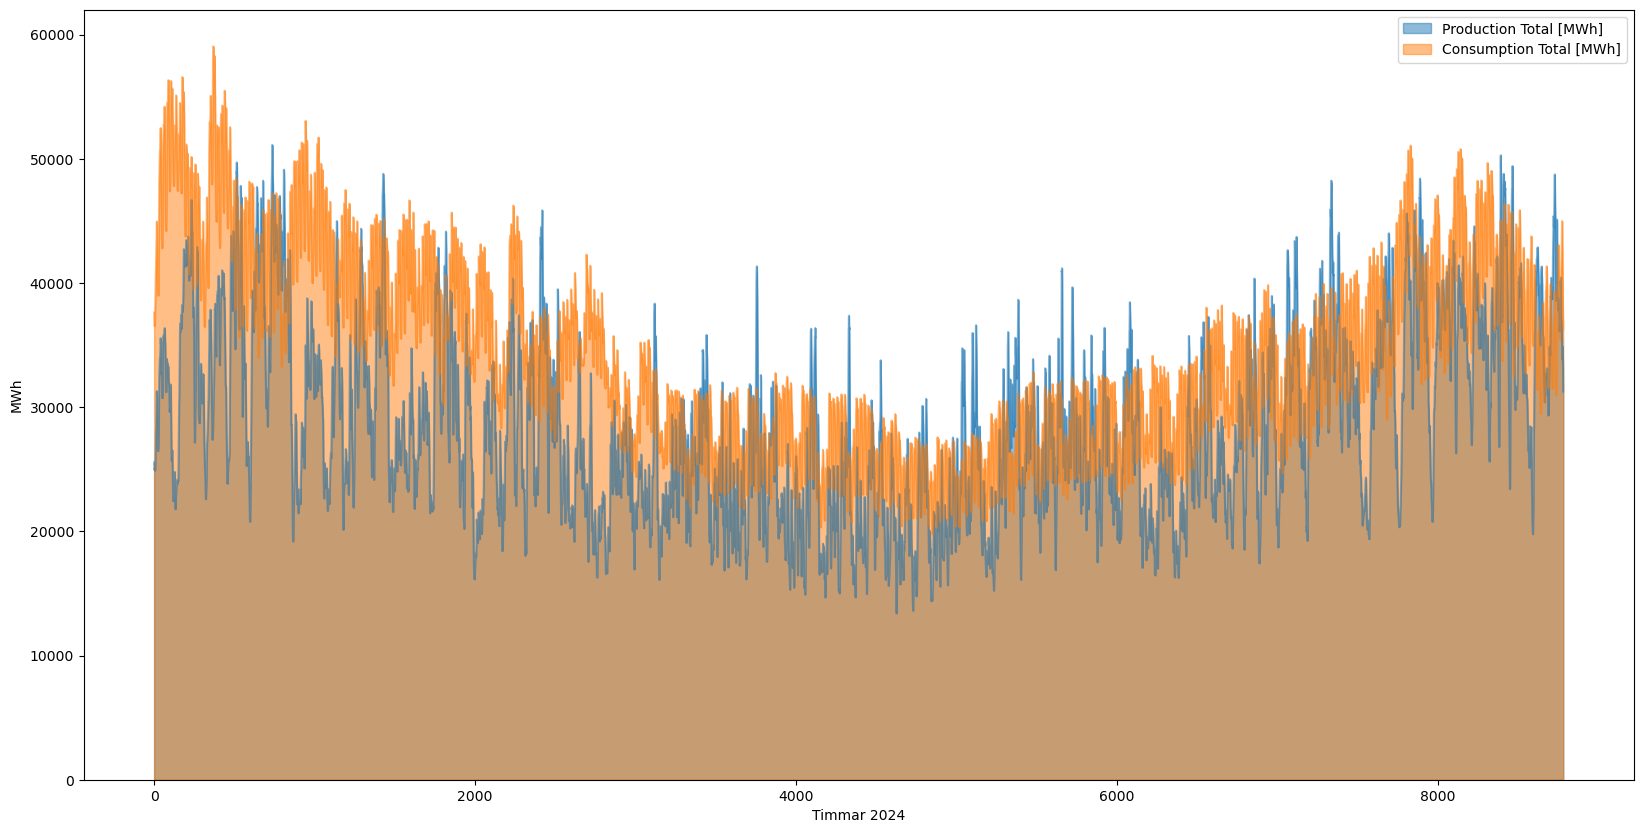

In [62]:
## Plottar 2024 prod och 300TWh last
ax_3 = pd.concat([prod_vind_data_5['Production Total [MWh]'] , consum_300_data['Consumption Total [MWh]'] ],axis=1).plot.area(figsize=(20, 10), stacked=False)
ax_3.set_xlabel('Timmar 2024')
ax_3.set_ylabel('MWh')
plt.show()

In [52]:
## kalkulerar behovet av lagring
prod_vind_data_5["storage"] = 0
prod_vind_data_5["Consumption Total [MWh]"] = consum_300_data['Consumption Total [MWh]']

In [53]:
## ger bara max av momentär skilland
#prod_vind_data_5['storage'] = np.maximum(consum_300_data['Consumption Total [MWh]'] - prod_vind_data_5['Production Total [MWh]'], 0)
for index, row in prod_vind_data_5.iterrows():
    if prod_vind_data_5['Consumption Total [MWh]'][index] > prod_vind_data_5['Production Total [MWh]'][index]:
        if index != 0:
            prod_vind_data_5["storage"][index] = prod_vind_data_5["storage"][index-1] + (prod_vind_data_5['Consumption Total [MWh]'][index] - prod_vind_data_5['Production Total [MWh]'][index])
    else:
        prod_vind_data_5["storage"][index] = 0

C:\Users\ft_sk\AppData\Local\Temp\ipykernel_10380\3189169666.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prod_vind_data_5["storage"][index] = prod_vind_data_5["storage"][index-1] + (prod_vind_data_5['Consumption Total [MWh]'][index] 

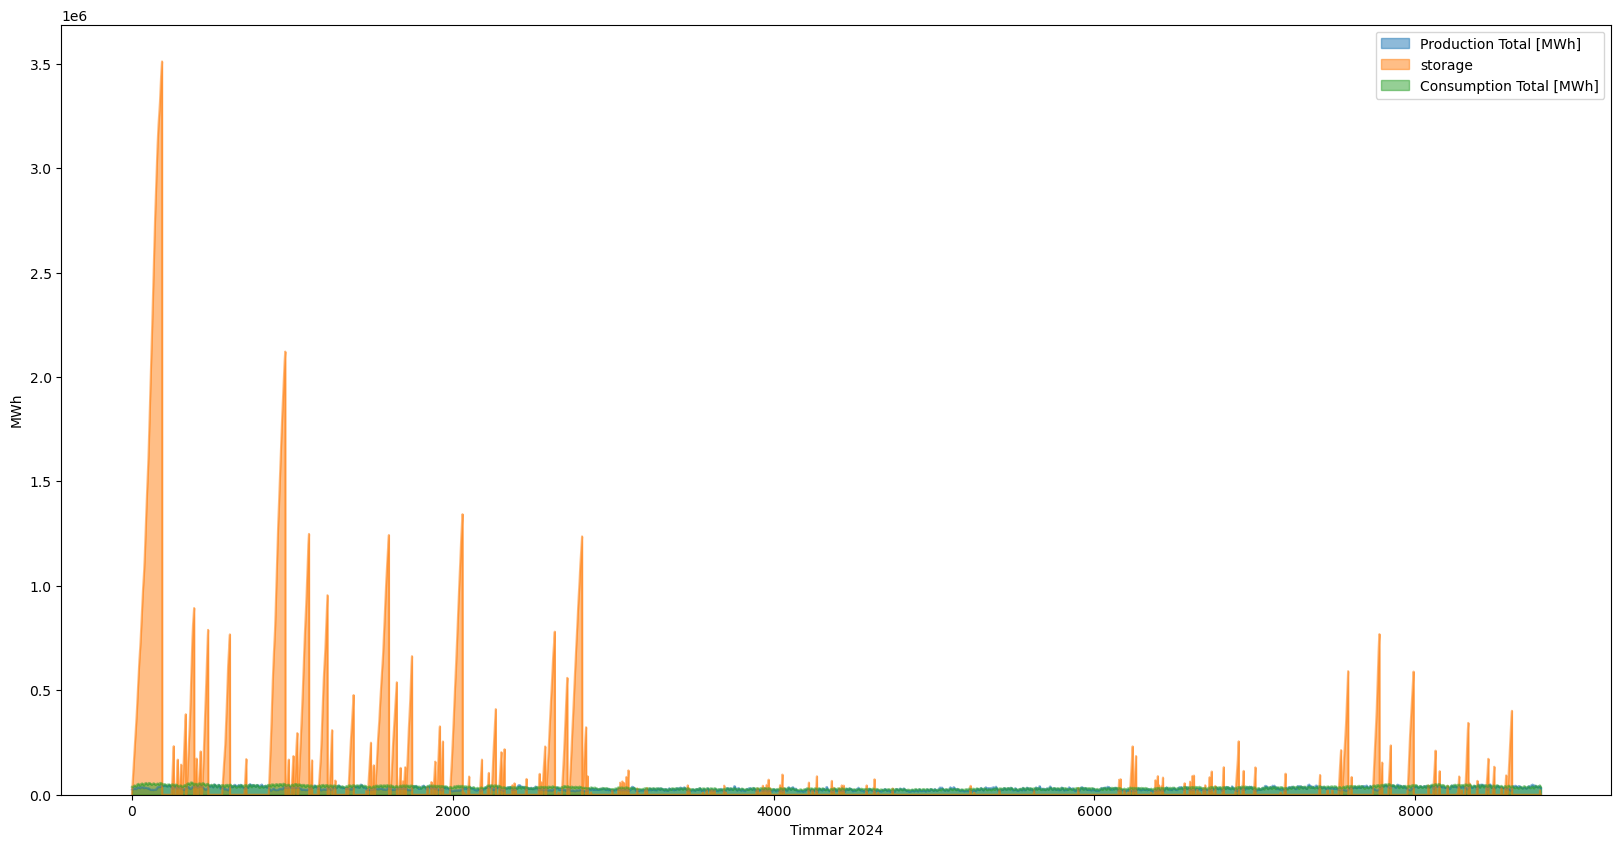

In [61]:
## Plottar 2024 prod och 300TWh last
ax_3 = pd.concat([prod_vind_data_5['Production Total [MWh]'], prod_vind_data_5['storage'], prod_vind_data_5['Consumption Total [MWh]'] ],axis=1).plot.area(figsize=(20, 10), stacked=False)
ax_3.set_xlabel('Timmar 2024')
ax_3.set_ylabel('MWh')
plt.show()

In [60]:
prod_vind_data_5['storage'].max()/1000000

3.511679486077839

In [ ]:
## ökad prod och lagring med ett finns import tillskott
# TODO  gör denna stand alone så att det inte påverkar tidigare kod

In [57]:
## ger bara max av momentär skilland
#prod_vind_data_5['storage'] = np.maximum(consum_300_data['Consumption Total [MWh]'] - prod_vind_data_5['Production Total [MWh]'], 0)
for index, row in prod_vind_data_5.iterrows():
    if (prod_vind_data_5['Consumption Total [MWh]'][index] > prod_vind_data_5['Production Total [MWh]'][index]) and (prod_vind_data_5['Consumption Total [MWh]'][index] - prod_vind_data_5['Production Total [MWh]'][index]) > 10000:
        if index != 0:
            prod_vind_data_5["storage"][index] = prod_vind_data_5["storage"][index-1] + (prod_vind_data_5['Consumption Total [MWh]'][index] - prod_vind_data_5['Production Total [MWh]'][index])
    else:
        prod_vind_data_5["storage"][index] = 0

KeyError: 'storage'

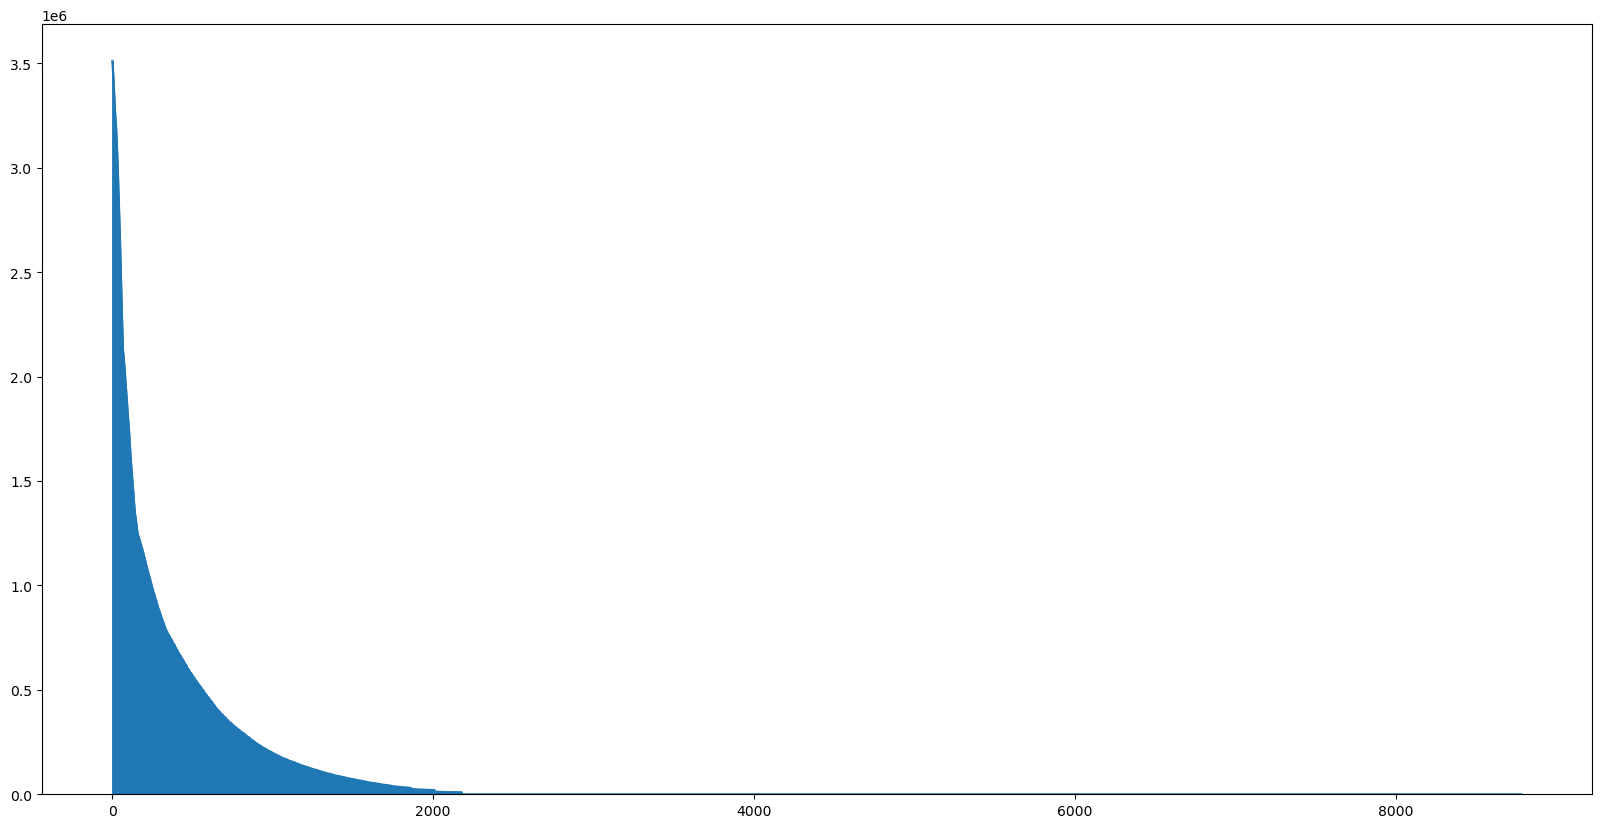

In [ ]:

duration_curve_data = prod_vind_data_5["storage"].sort_values( ascending=False)
duration_curve_data.reset_index()
duration_curve_data.reset_index()["storage"].plot.area(figsize=(20, 10))
duration_curve_data_1 = prod_vind_data_5['Consumption Total [MWh]'].sort_values( ascending=False)
duration_curve_data_1.reset_index()
#duration_curve_data_1.reset_index()["storage"].plot.area(figsize=(20, 10))
pd.concat([duration_curve_data.reset_index()["storage"], duration_curve_data_1.reset_index()["Consumption Total [MWh]"] ],axis=1)